# Import Dependencies

In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imghdr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
gpus =  tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
data_dir = 'drive/MyDrive/Training/Datasets/color_eye_classification'
def number_samples(data_dir = data_dir):
  for i in os.listdir(data_dir):
    categorie = os.listdir(os.path.join(data_dir, i))
    print(f'{i}: {len(categorie)} samples')
number_samples()

Green ok: 123 samples
Brown ok: 124 samples
Blue: 197 samples


In [ ]:
image_exts = ['jpeg', 'jpg', 'png', 'bmp']
image_calss = os.listdir(data_dir)

In [ ]:
def Remove_outliers(data_dir = data_dir):
  for image_class in os.listdir(data_dir):
      class_dir = os.path.join(data_dir, image_class)
      if os.path.isdir(class_dir):
          for image in os.listdir(class_dir):
              image_path = os.path.join(class_dir, image)
              try:
                  img = cv2.imread(image_path)
                  img_extension = imghdr.what(image_path)
                  if img_extension not in image_exts:
                      print('Image not in ext list: {}'.format(image_path))
                      os.remove(image_path)
              except Exception as e:
                  print('Issue with image {}: {}'.format(image_path, str(e)))

In [ ]:
Remove_outliers()

Image not in ext list: drive/MyDrive/Training/Datasets/color_eye_classification/Brown ok/vector7.svg
Image not in ext list: drive/MyDrive/Training/Datasets/color_eye_classification/Brown ok/vector8.svg
Image not in ext list: drive/MyDrive/Training/Datasets/color_eye_classification/Brown ok/vector6.svg
Image not in ext list: drive/MyDrive/Training/Datasets/color_eye_classification/Brown ok/vector9.svg
Image not in ext list: drive/MyDrive/Training/Datasets/color_eye_classification/Brown ok/vector4.svg
Image not in ext list: drive/MyDrive/Training/Datasets/color_eye_classification/Brown ok/vector3.svg
Image not in ext list: drive/MyDrive/Training/Datasets/color_eye_classification/Brown ok/vector5.svg
Image not in ext list: drive/MyDrive/Training/Datasets/color_eye_classification/Brown ok/vector10.svg
Image not in ext list: drive/MyDrive/Training/Datasets/color_eye_classification/Brown ok/vector12.svg
Image not in ext list: drive/MyDrive/Training/Datasets/color_eye_classification/Brown ok/

# Load Data

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                   image_size=(256, 256),
                                                   batch_size=32,
                                                   label_mode='categorical')

Found 444 files belonging to 3 classes.


# Preprocessing

In [ ]:
#Scale Data
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [ ]:
train_size = int(len(data) * 0.7)
val_size   = int(len(data) * 0.2) + 1
test_size  = int(len(data) * 0.1) + 1

In [ ]:
train = data.take(train_size)
val   = data.skip(train_size).take(val_size)
test  = data.skip(train_size + val_size).take(test_size)

# The model


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [ ]:
#Create the model
model = Sequential()

model.add(Conv2D(16, (3,3), 1 , activation='relu', input_shape = (256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1 , activation= 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1 , activation= 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(
    optimizer='adam',
    loss=tf.losses.CategoricalCrossentropy(),
    metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 16)       

In [ ]:
history = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
9/9 [==============================] - 17s 390ms/step - loss: 1.6399 - accuracy: 0.3125 - val_loss: 1.0735 - val_accuracy: 0.4062
Epoch 2/20
9/9 [==============================] - 6s 566ms/step - loss: 1.0606 - accuracy: 0.4618 - val_loss: 1.1208 - val_accuracy: 0.3542
Epoch 3/20
9/9 [==============================] - 5s 496ms/step - loss: 1.0227 - accuracy: 0.4688 - val_loss: 1.0469 - val_accuracy: 0.4062
Epoch 4/20
9/9 [==============================] - 6s 669ms/step - loss: 0.9959 - accuracy: 0.5208 - val_loss: 0.9738 - val_accuracy: 0.5208
Epoch 5/20
9/9 [==============================] - 5s 508ms/step - loss: 0.9324 - accuracy: 0.5729 - val_loss: 0.8721 - val_accuracy: 0.5833
Epoch 6/20
9/9 [==============================] - 8s 838ms/step - loss: 0.9169 - accuracy: 0.6007 - val_loss: 0.8180 - val_accuracy: 0.7292
Epoch 7/20
9/9 [==============================] - 8s 834ms/step - loss: 0.7914 - accuracy: 0.6910 - val_loss: 0.7775 - val_accuracy: 0.6771
Epoch 8/20
9/9 [===

# Evaluate the model

In [ ]:
print(f'train accuracy: {tf.round(model.evaluate(train, verbose=0)[1]*100,2)}%')
print(f'val accuracy: {tf.round(model.evaluate(val, verbose=0)[1]*100,2)}%')
print(f'test accuracy: {tf.round(model.evaluate(test, verbose=0)[1]*100,2)}%')

train accuracy: 95.0%
val accuracy: 97.0%
test accuracy: 97.0%


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
import tensorflow as tf

# Create an empty list to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the dataset and make predictions
for batch in test:
    inputs, true_batch_labels = batch  # Assuming your dataset provides both inputs and true labels
    predictions = model(inputs, training=False)  # Make predictions using your model

    # Convert the true_batch_labels tensor and predictions tensor to NumPy arrays
    true_batch_labels = true_batch_labels.numpy()
    predictions = predictions.numpy()

    true_labels.extend(true_batch_labels)
    predicted_labels.extend(tf.argmax(predictions, axis=1).numpy())
true_labels = np.array([label for label in true_labels])
true_labels = np.argmax(true_labels, axis=1)

In [ ]:
cm = confusion_matrix(true_labels,predicted_labels)

In [ ]:
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

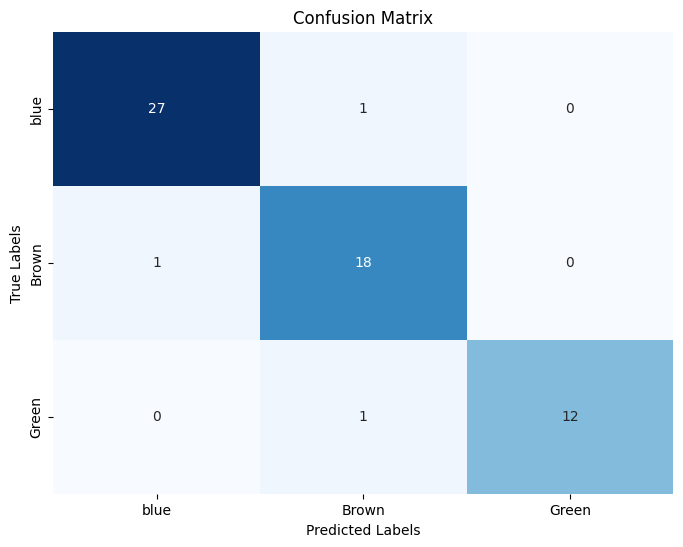

In [ ]:
class_names = [ 'blue','Brown','Green']
plot_confusion_matrix(cm, class_names)

# Load the model

In [ ]:
from tensorflow.keras.models import load_model
model.save(os.path.join('drive/MyDrive/Training/Save_models', 'Eye_color.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
